<a href="https://colab.research.google.com/github/FerBarrey/An-lisis-cuantitativo-avanzados/blob/main/Ejercicio_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 7

## Cargar la base

La siguiente base describe datos sobre los salarios, la formación y la experiencia de empleados que realizan entrevistas de trabajo.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mohithsairamreddy/salary-data

Dataset URL: https://www.kaggle.com/datasets/mohithsairamreddy/salary-data
License(s): Community Data License Agreement - Sharing - Version 1.0
  0% 0.00/16.6k [00:00<?, ?B/s]
100% 16.6k/16.6k [00:00<00:00, 19.6MB/s]


In [3]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [4]:
## Cargamos la base
df = pd.read_csv('/content/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Procesamiento de la base

Vemos que la variable `Education Level` tiene varios valores similares escritos de manera distinta.

In [5]:
df["Education Level"].value_counts()

,count
Education Level,
Bachelor's Degree,2267
Master's Degree,1573
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


Para unificar estos valores, la recatogrizamos creando una nueva variable denominada `Education New`:

In [6]:
df["Education New"]=df["Education Level"].copy()

In [7]:
df.loc[df["Education Level"].str.contains("Bach", na=False), "Education New"] = "Bachelor's"
df.loc[df["Education Level"].str.contains("Mast", na=False), "Education New"] = "Master's"
df.loc[df["Education Level"].str.contains("hD", na=False), "Education New"] = "PhD"

Verificamos que con estos cambios, las categorías quedaron unificadas

In [8]:
df["Education New"].value_counts()

,count
Education New,
Bachelor's,3023
Master's,1861
PhD,1369
High School,448


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Education New        6698 non-null   object 
dtypes: float64(3), object(4)
memory usage: 418.6+ KB


Borramos además los datos faltantes de la base

In [29]:
df=df.dropna()

Verificamos que ahora no quedan datos faltantes

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Education New        6698 non-null   object 
dtypes: float64(3), object(4)
memory usage: 418.6+ KB


# Preguntas

## Pregunta 1

Realizar un test de hipótesis para ver si la proporción de mujeres es significativamente menor al 50%.

*Ayuda:* el atributo `.shape` devuelve la cantidad de filas y columnas de una base. Por lo tanto, tomando `df.shape[0]` se calcula la cantidad de filas de la base `df` y por lo tanto, la cantidad de individuos.
Para contar la cantidad de mujeres, por ejemplo, se puede recorrer todas las filas de "Gender" viendo en cada instancia si el valor coincide con "Female". Cuando se suman esos valores, se obtiene la cantidad de mujeres: `np.sum(df["Gender"]=="Female")`. El valor de referencia sería `value=0.5` y determinar la hipótesis alternativa correspondiente. Utilizar el `help` para ver cómo funciona el comando.


In [28]:
from statsmodels.stats.proportion import proportions_ztest

In [13]:
help(proportions_ztest)

Help on function proportions_ztest in module statsmodels.stats.proportion:

proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
    Test for proportions based on normal (z) test
    
    Parameters
    ----------
    count : {int, array_like}
        the number of successes in nobs trials. If this is array_like, then
        the assumption is that this represents the number of successes for
        each independent sample
    nobs : {int, array_like}
        the number of trials or observations, with the same length as
        count.
    value : float, array_like or None, optional
        This is the value of the null hypothesis equal to the proportion in the
        case of a one sample test. In the case of a two-sample test, the
        null hypothesis is that prop[0] - prop[1] = value, where prop is the
        proportion in the two samples. If not provided value = 0 and the null
        is prop[0] = prop[1]
    alternative : str in ['two-sided', 'sma

**Desarrollo Pregunta 1:**

In [30]:
#Se calcula la proporcion de mujeres sobre el total de individuos
np.sum(df["Gender"]=="Female")/df.shape[0]

0.44983577187220064

In [32]:
# Test de hipótesis para ver si la proporción de mujeres es significativamente menor al 50%.
"""Detalle de como funciona el comando: Examples
    --------
    >>> count = 5
    >>> nobs = 83
    >>> value = .05
    >>> stat, pval = proportions_ztest(count, nobs, value)
    >>> print('{0:0.3f}'.format(pval))
    0.695

    >>> import numpy as np
    >>> from statsmodels.stats.proportion import proportions_ztest
    >>> count = np.array([5, 12])
    >>> nobs = np.array([83, 99])
    >>> stat, pval = proportions_ztest(count, nobs)
    >>> print('{0:0.3f}'.format(pval))
    0.159 """
import numpy as np
# Calculamos la cantidad de mujeres
tot_mujeres= np.sum(df["Gender"] == "Female")

# Total de individuos
tot_indiv = df.shape[0]

# Realizamos el test de hipótesis
""" El valor de alternative es igual a 'smaller' porque la pregunta que se está tratando de responder es si la proporción de mujeres es significativamente menor al 50%.
En un test de hipótesis, la hipótesis alternativa es aquella que se quiere demostrar. En este caso, se quiere demostrar que la proporción de mujeres es menor al 50%, por lo que la hipótesis alternativa es 'smaller'.
Si la pregunta fuera si la proporción de mujeres es diferente al 50%, entonces el valor de alternative sería 'two-sided' """
count = tot_mujeres
nobs = tot_indiv
value = 0.5
alternative = 'smaller'  # La hipótesis alternativa es que la proporción de mujeres es menor al 50%
stat, pval = proportions_ztest(count, nobs, value, alternative=alternative)

print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {pval}")

Estadístico de prueba: -8.252652095126743
Valor p: 7.745877354389196e-17


**Respuesta 1:** Investigando sobre el resultado surge que el valor p es 7.74e-17(0.000000000000000077458), que es mucho menor que el nivel de significancia usual de 0.05. Esto significa que se rechaza la hipótesis nula de que la proporción de mujeres es igual a 0.5.

El estadístico de prueba es -8.25, que es un valor negativo grande. Esto indica que la proporción de mujeres en la muestra es significativamente menor que 0.5.

Por lo tanto, se puede concluir que la proporción de mujeres es significativamente menor al 50% en la población de la que se extrajo la muestra.
**Aclaración teorica sobre el valor p(p-value) :** representa la probabilidad de observar los resultados obtenidos en la muestra, o resultados aún más extremos, si la hipótesis nula fuera cierta.

En otras palabras, si la proporción de mujeres en la población realmente fuera del 50%, el valor p indica cuán probable sería obtener una muestra con una proporción de mujeres tan baja (o más baja) como la observada en tus datos.

Un valor p pequeño (generalmente menor a 0.05) indica que es poco probable obtener los resultados observados si la hipótesis nula fuera cierta. Esto proporciona evidencia para rechazar la hipótesis nula y apoyar la hipótesis alternativa.

## Pregunta 2

Notemos que el porcentaje identificado como `Other` en la base es pequeño y no es un número que permita obtener conclusiones estadísticas pertinentes.

Realizar un test de hipótesis para ver si el salario medio de los hombres es **mayor** que el de las mujeres, según estos datos.

*Ayuda:* Se están evaluando medias, no porcentajes, por lo que se usa la función provista. Para comparar las medias, se deben pasar dos conjuntos de datos como argumento. Para identificar, por ejemplo, los datos de salarios sólo de las mujeres, se puede utilizar el siguiente comando: `df.Salary[df["Gender"]=="Female"]`

In [14]:
from statsmodels.stats.weightstats import ztest

In [15]:
help(ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la

**Desarrollo pregunta 2:** Soporte teorico: La hipótesis nula es un concepto fundamental en las pruebas de hipótesis estadísticas.

En términos simples, la hipótesis nula es una afirmación que se asume como verdadera para empezar. Es la afirmación que se está tratando de refutar o "anular" con la prueba de hipótesis.

Generalmente, la hipótesis nula plantea que no hay diferencia, efecto o relación entre las variables que se están estudiando.

Ejemplo:

Cuanda estamos  estudiando si existe una diferencia en el salario medio entre hombres y mujeres, la hipótesis nula sería: "No hay diferencia en el salario medio entre hombres y mujeres".

Durante la prueba de hipótesis, se busca evidencia para rechazar la hipótesis nula. Si la evidencia es lo suficientemente fuerte (valor p bajo), se rechaza la hipótesis nula en favor de la hipótesis alternativa (que sí plantea una diferencia, efecto o relación).

Es importante recordar que no se puede "probar" la hipótesis nula. Solo se puede rechazar o no rechazar con cierto grado de confianza.

In [34]:
from statsmodels.stats.weightstats import ztest
df.Salary[df["Gender"]=="Female"]
df.Salary[df["Gender"]=="Male"]
ztest(df.Salary[df["Gender"]=="Female"], df.Salary[df["Gender"]=="Male"])
# referencia de codigo : ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)




(-10.489305680117718, 9.673662834272327e-26)

**Respuesta pregunta 2:** (-10.489305680117718,
 9.673662834272327e-26) son los resultados de la prueba ztest que compara el salario medio de hombres y mujeres. El valor -10.489... (Estadístico de prueba) es grande y negativo  e  indica que la media del primer grupo (mujeres) es considerablemente menor que la media del segundo grupo (hombres).
9.673...e-26 (Valor p): Este valor es extremadamente pequeño (prácticamente cero).
Conclusión: Dado que el valor p es mucho menor que el nivel de significancia usual de 0.05, se rechaza la hipótesis nula de que no hay diferencia en los salarios medios.

En este caso, la evidencia sugiere que existe una diferencia estadísticamente significativa entre los salarios de hombres y mujeres, y que el salario medio de las mujeres es significativamente menor al de los hombres.

In [35]:
# Acá calculamos el salario medio para hombres y para mujeres solo para observar la afirmacion de la respuesta 2

#salario medio para hombres
mean_salary_male = df.Salary[df["Gender"] == "Male"].mean()
print(f"Salario medio para hombres: {mean_salary_male}")

#salario medio para mujeres
mean_salary_female = df.Salary[df["Gender"] == "Female"].mean()
print(f"Salario medio para mujeres: {mean_salary_female}")

Salario medio para hombres: 121395.69763007356
Salario medio para mujeres: 107888.99867241952


## Pregunta 3

Realizar un test de ANOVA para ver si el salario medio cambia con los distintos niveles educativos. Utilizar la comparación múltiple para ver cuáles son diferentes entre sí

*Ayuda:* Los datos deben pasarse en una **lista**. Entonces, habría que definir previamente los datos de salario para cada nivel educativo. Para identificar el salario por cada nivel educativo, se puede usar la ayuda anterior reemplazando "Gender" por "Education New" y "Female" por "High School" para obtener los salarios de personas con título secundario completo. Para la comparación múltiple, se pueden usar directamente las columnas `df["Salary"]` (datos) y `df["Education New"]` (grupos).

In [33]:
from statsmodels.stats.oneway import anova_oneway
from statsmodels.sandbox.stats.multicomp import MultiComparison

Desarrollo pregunta 3: Soporte teorico según lo investigado:Un test ANOVA (ANalysis Of VAriance) se utiliza para comparar las medias de tres o más grupos. Determina si existe una diferencia estadísticamente significativa entre las medias de los grupos o si se trata de variaciones aleatorias

In [37]:
# Datos de salarios de individuos con título secundario completo
x1= df.Salary[df["Education New"] == "High School"]
# Datos de salarios de individuos con título de grado completo
x2= df.Salary[df["Education New"] == "Bachelor's"]
# Datos de salarios de individuos con título de maestría completo
x3= df.Salary[df["Education New"] == "Master's"]
# Datos de salarios de individuos con título de doctorado completo
x4= df.Salary[df["Education New"] == "PhD"]
print(anova_oneway([x1,x2,x3,x4]))
MC=MultiComparison(df['Salary'], df['Education New'])
print(MC.tukeyhsd())

statistic = 3041.3825616847093
pvalue = 0.0
df = (3.0, 2121.411447112915)
df_num = 3.0
df_denom = 2121.411447112915
nobs_t = 6698.0
n_groups = 4
means = [ 36706.69419643  95082.90863952 130112.05645161 165651.45799854]
nobs = [ 448. 3021. 1860. 1369.]
vars_ = [5.08463264e+08 1.94408596e+09 1.65167616e+09 1.17921854e+09]
use_var = unequal
welch_correction = True
tuple = (3041.3825616847093, 0.0)
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1      group2     meandiff  p-adj    lower       upper    reject
------------------------------------------------------------------------
 Bachelor's High School -58376.2144   0.0 -63597.4627 -53154.9661   True
 Bachelor's    Master's  35029.1478   0.0  31989.5989  38068.6967   True
 Bachelor's         PhD  70568.5494   0.0  67208.5303  73928.5684   True
High School    Master's  93405.3623   0.0  87977.7478  98832.9767   True
High School         PhD 128944.7638   0.0 123331.3986  134558.129   True
   Master's       

In [38]:
help(anova_oneway)
help(MultiComparison)

Help on function anova_oneway in module statsmodels.stats.oneway:

anova_oneway(data, groups=None, use_var='unequal', welch_correction=True, trim_frac=0)
    Oneway Anova
    
    This implements standard anova, Welch and Brown-Forsythe, and trimmed
    (Yuen) variants of those.
    
    Parameters
    ----------
    data : tuple of array_like or DataFrame or Series
        Data for k independent samples, with k >= 2.
        The data can be provided as a tuple or list of arrays or in long
        format with outcome observations in ``data`` and group membership in
        ``groups``.
    groups : ndarray or Series
        If data is in long format, then groups is needed as indicator to which
        group or sample and observations belongs.
    use_var : {"unequal", "equal" or "bf"}
        `use_var` specified how to treat heteroscedasticity, unequal variance,
        across samples. Three approaches are available
    
        "unequal" : Variances are not assumed to be equal across s

## Pregunta 4

Testear si la variable de años de experiencia tiene distribución normal y obtenga alguna conclusión. Hacer un histograma de la variable para comparar con los resultados del test.



In [39]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [40]:
help(shapiro)
help(plt.hist)

Help on function shapiro in module scipy.stats._morestats:

shapiro(x, *, axis=None, nan_policy='propagate', keepdims=False)
    Perform the Shapiro-Wilk test for normality.
    
    The Shapiro-Wilk test tests the null hypothesis that the
    data was drawn from a normal distribution.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    axis : int or None, default: None
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan_policy : {'propagate', 'omit', 'raise'}
        Defines how to handle input NaNs.
        
        - ``propagate``: if a NaN is present in the axis slice (e.g. row) along
          which the  statistic is computed, the corresponding entry of the output
          will be NaN.
        - ``omit``: Na

Desarollo Pregunta 4:soporte teorico:shapiro es una función en Python que realiza la prueba de Shapiro-Wilk para la normalidad.

Esta prueba es una prueba de hipótesis que se utiliza para determinar si una muestra de datos proviene de una población con distribución normal.

La función devuelve dos valores: el estadístico de prueba W y el valor p. Si el valor p es menor que un nivel de significancia elegido (por ejemplo, 0.05), entonces se rechaza la hipótesis nula de que los datos provienen de una población con distribución normal. Que una población tiene una distribución normal significa que los valores de la población se distribuyen de forma simétrica alrededor de la media, formando una curva en forma de campana.

En una distribución normal, la mayoría de los valores se agrupan cerca de la media, y a medida que los valores se alejan de la media, su frecuencia disminuye.

La distribución normal se caracteriza por su media y su desviación estándar. La media es el centro de la distribución, y la desviación estándar mide la dispersión de los datos alrededor de la media.

Hay muchas variables en la naturaleza y en la sociedad que siguen una distribución normal, como la altura de las personas, el peso de los objetos, las puntuaciones de los exámenes, etc

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6698.
  res = hypotest_fun_out(*samples, **kwds)


stat=0.920, p=0.000
Probably not Gaussian


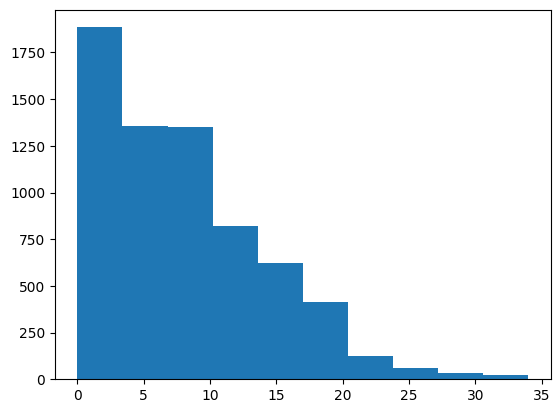

In [41]:
#Se define la variable año de experienca
years = df['Years of Experience']
#Seaplica la funcion de Shapiro
stat, p = shapiro(years)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
#Luego graficamos el histograma
plt.hist(years)
plt.show()


**Respuesta 4:**A partir del resultado de la prueba utilizando la funcion de Shapiro, se puede ver que el valor p es inferior a 0,05, por lo que los datos probablemente no sean gaussianos(no siguen una distribucion normal, o se la mayoria de los valores se agrupan alrededor de la media y la frecuencia disminuye a medida que nos alejamos de la media). Esto lo confirma el histograma, que muestra que los datos no son simétricos y tienen una cola más larga en el lado derecho.La concentracion de valores la tenemos entre 0 y 20.

## Pregunta 5

Testear si hay correlación significativa entre las variables de años de experiencia y el salario. Hacer un gráfico de dispersión para contrastar con el resultado provisto por el test.



In [21]:
from scipy.stats import pearsonr

In [22]:
help(pearsonr)
help(plt.scatter)

Help on function pearsonr in module scipy.stats._stats_py:

pearsonr(x, y, *, alternative='two-sided', method=None)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelated system
    producing 

In [23]:
from statsmodels.stats.weightstats import zconfint